<a href="https://colab.research.google.com/github/FathimaNazarudeen/s3./blob/main/dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! /content/drive/MyDrive/autism

/bin/bash: /content/drive/MyDrive/autism: Is a directory


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [3]:
train_dir="/content/drive/MyDrive/autism/Autism/train"
val_dir="/content/drive/MyDrive/autism/Autism/valid"

In [4]:
train_data=train_datagen.flow_from_directory(train_dir, target_size=(224, 224), class_mode='binary', batch_size=1,seed=42)
valid_data=valid_datagen.flow_from_directory(val_dir, target_size=(224, 224), class_mode='binary',batch_size=1,seed=42)

Found 2536 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [12]:
model_1=tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters=10,
                                                           kernel_size=3,
                                                           activation="relu",
                                                           input_shape=(224,224,3)),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(pool_size=2,
                                                              padding="valid"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(2,activation="softmax")])

In [14]:
model_1.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [15]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [16]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20)

In [17]:
model=model_1.fit(train_data,epochs=100,validation_data=valid_data,steps_per_epoch=50,callbacks=[callback])

Epoch 1/100
50/50 [==============================] - 13s 255ms/step - loss: 0.9546 - accuracy: 0.4800 - val_loss: 0.7081 - val_accuracy: 0.3400
Epoch 2/100
50/50 [==============================] - 11s 216ms/step - loss: 0.6326 - accuracy: 0.7000 - val_loss: 0.7383 - val_accuracy: 0.5000
Epoch 3/100
50/50 [==============================] - 11s 231ms/step - loss: 0.6915 - accuracy: 0.5800 - val_loss: 0.6656 - val_accuracy: 0.5700
Epoch 4/100
50/50 [==============================] - 11s 207ms/step - loss: 0.6761 - accuracy: 0.6400 - val_loss: 0.6764 - val_accuracy: 0.5600
Epoch 5/100
50/50 [==============================] - 13s 261ms/step - loss: 0.6888 - accuracy: 0.6000 - val_loss: 0.6629 - val_accuracy: 0.6100
Epoch 6/100
50/50 [==============================] - 12s 244ms/step - loss: 0.6748 - accuracy: 0.5400 - val_loss: 0.6657 - val_accuracy: 0.6600
Epoch 7/100
50/50 [==============================] - 13s 263ms/step - loss: 0.6627 - accuracy: 0.6200 - val_loss: 0.6410 - val_accuracy:

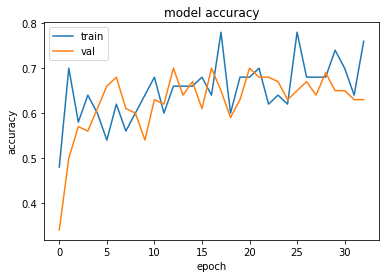

In [23]:
import matplotlib.pyplot as plt
import keras
from matplotlib import pyplot as plt
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

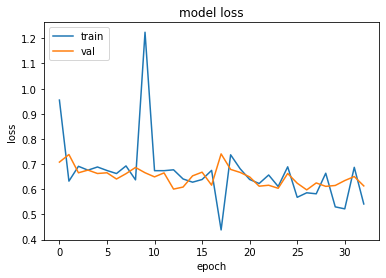

In [24]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [62]:
from tensorflow.keras.preprocessing import image

In [69]:
def predictImage(filename):
  img1=image.load_img(filename,target_size=(224,224))
  plt.imshow(img1)
  Y=image.img_to_array(img1)
  X=np.expand_dims(Y,axis=0)
  val=model_1.predict(X)
  val=str(val)
  print(val)
  #print(val[[0]])
  if val=="[[0.1.]]":
    plt.xlabel("autism",fontsize=30)
  elif val=="[[1.0.]]":
    plt.xlabel("not autism",fontsize=30)

[[1.2788658e-05 9.9998724e-01]]


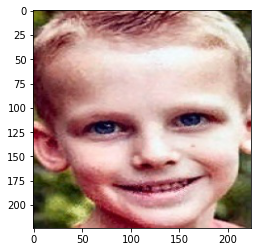

In [73]:
predictImage("/content/drive/MyDrive/autism/Autism/test/non_autistic/003.jpg")